<a href="https://colab.research.google.com/github/CEMPAplicaciones/MIA/blob/main/Modulo_2/2_3_3_Extraccion_de_caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de características

## Análisis de la componente principal (PCA)
El análisis de la componente principal, o PCA por sus siglas en inglés, es una técnica estadística utilizada para reducir la dimensionalidad de un conjunto de datos. PCA nos permite simplificar la información presente en un conjunto de datos con múltiples variables y transformarla en un conjunto de datos reducido, pero que todavía retiene gran parte de la información original.

El objetivo del PCA es encontrar una representación de los datos que sea más fácil de entender y que conserve la mayor cantidad posible de la varianza en los datos.

Para llevar a cabo un análisis PCA primero se calcula la matriz de covarianza de los datos originales. A continuación, se calculan los vectores propios de esta matriz, que nos indican las direcciones en las que los datos tienen la mayor varianza. Luego, se proyectan los datos originales en estas direcciones y se obtiene un nuevo conjunto de datos con menos variables que aún captura gran parte de la información original.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Cargamos los datos del modulo de Scikit-learn para los ejemplos
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

# Creamos nuestro dataset a partir de los datos cargados
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Y mostramos algunas variables por pantalla
print("🏥 DATASET DE CÁNCER DE MAMA - PRIMERAS 5 FILAS")
print("=" * 60)
print(df.head())

# Información adicional sobre el dataset médico
print(f"\n📊 INFORMACIÓN DEL DATASET:")
print(f"   Número de pacientes: {len(df)}")
print(f"   Número de variables clínicas: {len(df.columns)}")
print(f"   Clases diagnósticas: {cancer_data.target_names}")

# Contar diagnósticos
print(f"   Distribución de casos:")
target_counts = pd.Series(cancer_data.target).value_counts()
for i, count in target_counts.items():
   percentage = (count / len(cancer_data.target)) * 100
   print(f"     {cancer_data.target_names[i]}: {count} casos ({percentage:.1f}%)")


🏥 DATASET DE CÁNCER DE MAMA - PRIMERAS 5 FILAS
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius 

In [8]:
"""
Utilizaremos scikit-learn para aplicar la técnica de preprocesamiento StandardScaler.
El objetivo es transformar los datos para que tengan una media cero y una desviación
estándar unitaria. Esto es crucial para análisis médico ya que las variables clínicas
tienen escalas muy diferentes (ej: radio vs textura vs área).
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Rescalamos los datos teniendo en cuenta la media y desviación estándar de cada variable
# El método "fit" ajusta el modelo a los datos originales
scaler.fit(df.values)

# Utilizamos la función "transform" de la clase StandardScaler para aplicar
# la transformación a los datos originales. El resultado de esta transformación
# se almacena en la variable "X_scaled"
X_scaled = scaler.transform(df.values)
print("🔬 DATOS NORMALIZADOS (primeras 5 filas, 5 columnas):")
print(X_scaled[:5, :5])

# Verificación de la normalización
print(f"\n✅ VERIFICACIÓN DE NORMALIZACIÓN:")
print(f"   Media de datos normalizados: {np.mean(X_scaled, axis=0)[:5].round(3)}")
print(f"   Desviación estándar: {np.std(X_scaled, axis=0)[:5].round(3)}")


🔬 DATOS NORMALIZADOS (primeras 5 filas, 5 columnas):
[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633]
 [ 1.82982061 -0.35363241  1.68595471  1.90870825 -0.82696245]
 [ 1.57988811  0.45618695  1.56650313  1.55888363  0.94221044]
 [-0.76890929  0.25373211 -0.59268717 -0.76446379  3.28355348]
 [ 1.75029663 -1.15181643  1.77657315  1.82622928  0.28037183]]

✅ VERIFICACIÓN DE NORMALIZACIÓN:
   Media de datos normalizados: [-0. -0. -0. -0.  0.]
   Desviación estándar: [1. 1. 1. 1. 1.]


In [13]:
# Vamos a utilizar las funciones de Sci-kit learn para análisis PCA
from sklearn.decomposition import PCA

# Para evaluar los resultados, utilizaremos el conjunto completo de variables
# "n_components" = 30 especifica que el PCA se ha de ajustar a los datos para encontrar
# las 30 componentes principales (el dataset tiene 30 variables)
pca = PCA(n_components=30, random_state=2020)
pca.fit(X_scaled)

# Almacenamos en la variable X_pca los valores de los (30) componentes principales
X_pca = pca.transform(X_scaled)
print("🔬 DATOS TRANSFORMADOS POR PCA (primeras 5 filas, 10 componentes):")
print(X_pca[:5, :10])

# Puesto que seleccionamos el conjunto completo de variables las componentes
# seleccionadas deben dar cuenta del 100% de la varianza en los datos
varianza_total = sum(pca.explained_variance_ratio_ * 100)
print(f"\n => Varianza explicada por las componentes: {varianza_total:.2f}%")

# Análisis detallado de componentes principales
print(f"\n📊 ANÁLISIS DE COMPONENTES PRINCIPALES:")
print(f"   Componentes totales: {pca.n_components_}")
print(f"   Forma de datos transformados: {X_pca.shape}")

# Mostrar varianza explicada por las primeras componentes
print(f"\n🔍 VARIANZA EXPLICADA POR COMPONENTE:")
for i in range(10):  # Primeras 10 componentes
   var_exp = pca.explained_variance_ratio_[i] * 100
   var_acum = sum(pca.explained_variance_ratio_[:i+1]) * 100
   print(f"   PC{i+1}: {var_exp:.2f}% (Acumulada: {var_acum:.2f}%)")


🔬 DATOS TRANSFORMADOS POR PCA (primeras 5 filas, 10 componentes):
[[ 9.19283683  1.94858307 -1.12316616 -3.6337309   1.19511012  1.41142445
   2.15936987 -0.39840723 -0.15711836 -0.87740188]
 [ 2.3878018  -3.76817174 -0.52929269 -1.11826386 -0.62177498  0.02865635
   0.01335809  0.24098846 -0.71190482  1.10699494]
 [ 5.73389628 -1.0751738  -0.55174759 -0.91208267  0.1770859   0.54145215
  -0.66816648  0.09737374  0.02406564  0.4542754 ]
 [ 7.1229532  10.27558912 -3.23278955 -0.15254703  2.9608784   3.05342182
   1.4299107   1.05956524 -1.40543967 -1.11697527]
 [ 3.93530207 -1.94807157  1.38976673 -2.94063935 -0.5467474  -1.22649464
  -0.93621255  0.63637606 -0.26380546  0.37770447]]

 => Varianza explicada por las componentes: 100.00%

📊 ANÁLISIS DE COMPONENTES PRINCIPALES:
   Componentes totales: 30
   Forma de datos transformados: (569, 30)

🔍 VARIANZA EXPLICADA POR COMPONENTE:
   PC1: 44.27% (Acumulada: 44.27%)
   PC2: 18.97% (Acumulada: 63.24%)
   PC3: 9.39% (Acumulada: 72.64%)
   

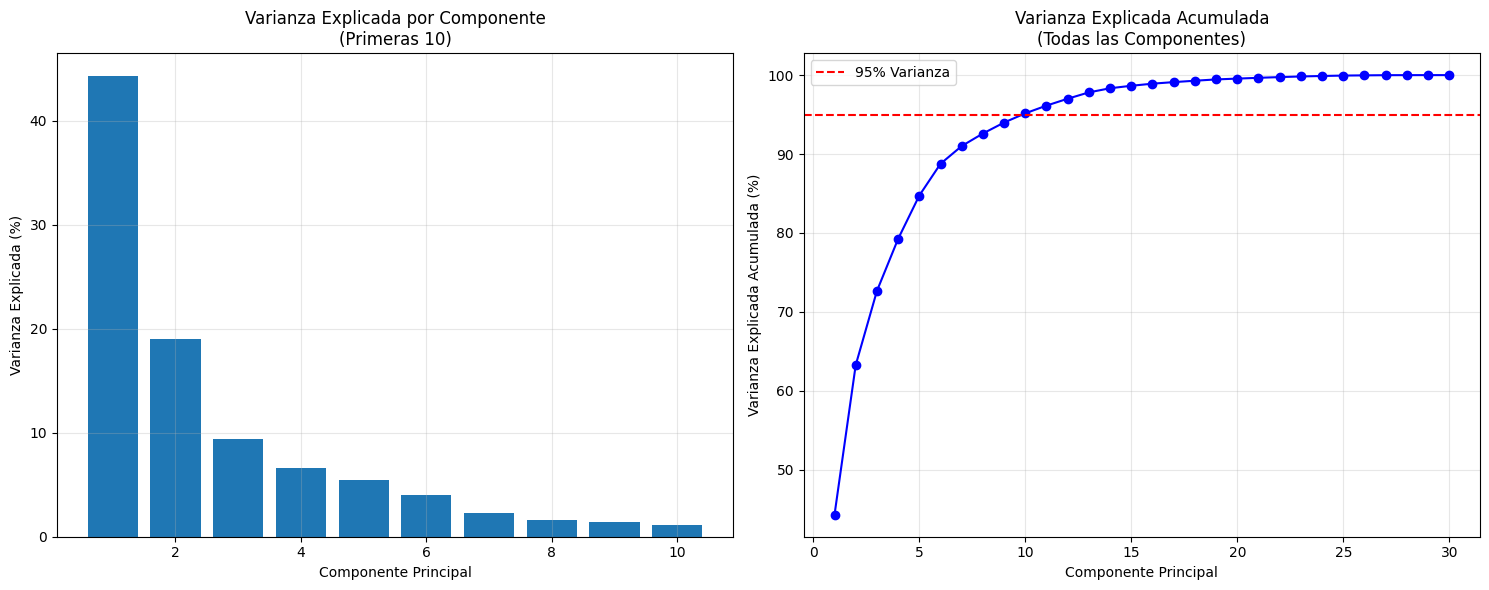

In [15]:
# Visualización de varianza explicada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Varianza explicada por las 10 primeras components
ax1.bar(range(1, 11), pca.explained_variance_ratio_[:10] * 100)
ax1.set_title('Varianza Explicada por Componente\n(Primeras 10)')
ax1.set_xlabel('Componente Principal')
ax1.set_ylabel('Varianza Explicada (%)')
ax1.grid(True, alpha=0.3)

# Varianza explicada acumulada
ax2.plot(range(1, 31), np.cumsum(pca.explained_variance_ratio_) * 100, 'bo-')
ax2.axhline(y=95, color='r', linestyle='--', label='95% Varianza')
ax2.set_title('Varianza Explicada Acumulada\n(Todas las Componentes)')
ax2.set_xlabel('Componente Principal')
ax2.set_ylabel('Varianza Explicada Acumulada (%)')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 🏥 EJERCICIOS : Interpretación de PCA en datos clínicos
# Descomenta y practica:

# Ejemplo 1: Encontrar número óptimo de componentes para 95% varianza
# varianza_acumulada = np.cumsum(pca.explained_variance_ratio_)
# n_comp_95 = np.argmax(varianza_acumulada >= 0.95) + 1
# print(f"Componentes necesarias para 95% varianza: {n_comp_95}")
# print(f"Reducción dimensional: {df.shape[1]} → {n_comp_95} variables")

# Ejemplo 2: Analizar carga de variables en primeras componentes
# loadings = pca.components_[:3]  # Primeras 3 componentes
# for i, loading in enumerate(loadings):
#     indices_importantes = np.argsort(np.abs(loading))[-5:]  # Top 5 variables
#     print(f"\nPC{i+1} - Variables más influyentes:")
#     for idx in indices_importantes:
#         print(f"  {df.columns[idx]}: {loading[idx]:.3f}")

# Ejemplo 3: Evaluar calidad de la reducción dimensional
# print(f"\nCalidad de la transformación PCA:")
# print(f"  Información conservada: {varianza_total:.1f}%")
# print(f"  Información perdida: {100 - varianza_total:.1f}%")
# print(f"  Dimensionalidad: {df.shape[1]} → {X_pca.shape[1]} variables")

In [ ]:
# Vemos que con solo un tercio de las variables podemos explicar el 95% de la variaza
n_var = np.cumsum(pca.explained_variance_ratio_ * 100)[9]
print("Varianza 10 primeras componenetes:", n_var)

Varianza 10 primeras componenetes: 95.15688143366671


🎯 PCA OPTIMIZADO PARA 95% DE VARIANZA:
   Componentes seleccionadas automáticamente: 10
   Varianza explicada real: 95.16%
   Reducción dimensional: 30 → 10 variables
   Eficiencia: 66.7% reducción


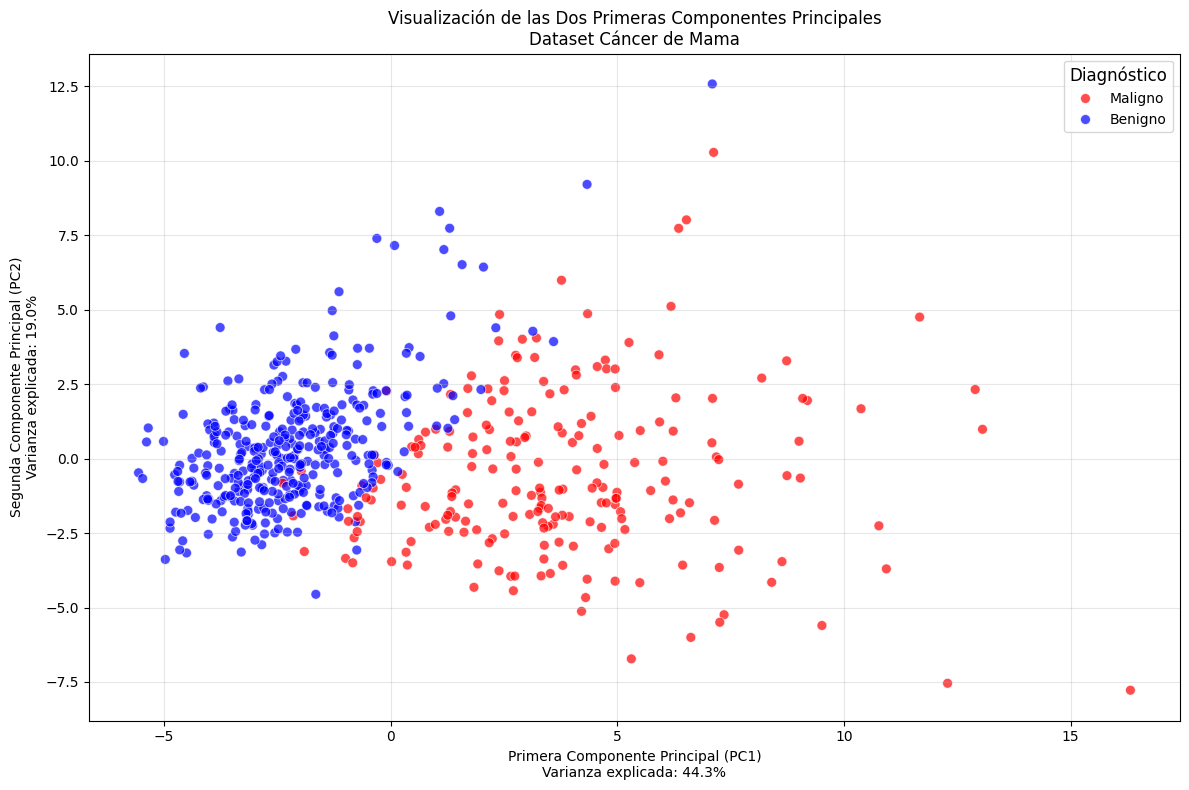

In [17]:
# Alternativamente, podemos construir el conjunto que acomode el 95% de la varianza
# del siguiente modo - Esto es más práctico para aplicaciones médicas
pca_95 = PCA(n_components=0.95, random_state=2020)
pca_95.fit(X_scaled)
X_pca_95 = pca_95.transform(X_scaled)

print(f"🎯 PCA OPTIMIZADO PARA 95% DE VARIANZA:")
print(f"   Componentes seleccionadas automáticamente: {pca_95.n_components_}")
print(f"   Varianza explicada real: {sum(pca_95.explained_variance_ratio_) * 100:.2f}%")
print(f"   Reducción dimensional: {X_scaled.shape[1]} → {X_pca_95.shape[1]} variables")
print(f"   Eficiencia: {(1 - pca_95.n_components_/X_scaled.shape[1]) * 100:.1f}% reducción")

# Una buena práctica es visualizar la relación de las principales componentes
import seaborn as sns

# Crear etiquetas más descriptivas para el gráfico
target_labels = ['Maligno', 'Benigno']
target_colors = ['red', 'blue']

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X_pca_95[:, 0], y=X_pca_95[:, 1],
                        hue=cancer_data.target,
                        palette=target_colors,
                        alpha=0.7,
                        s=50)

# Personalizar el gráfico
plt.title('Visualización de las Dos Primeras Componentes Principales\nDataset Cáncer de Mama')
plt.xlabel(f'Primera Componente Principal (PC1)\nVarianza explicada: {pca_95.explained_variance_ratio_[0]*100:.1f}%')
plt.ylabel(f'Segunda Componente Principal (PC2)\nVarianza explicada: {pca_95.explained_variance_ratio_[1]*100:.1f}%')

# Personalizar la leyenda
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, target_labels, title='Diagnóstico', title_fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



## Descripción del gráfico de las componentes principales

1. **Reducción de Dimensionalidad**: PCA es una técnica de reducción de dimensionalidad que transforma las variables originales en un nuevo conjunto de variables (componentes principales) que son ortogonales (no correlacionadas) entre sí. Estos componentes principales capturan la mayor parte de la variabilidad presente en los datos originales.

2. **Visualización de Componentes Principales**: Al graficar los dos primeros componentes principales (`X_pca_95[:, 0]` y `X_pca_95[:, 1]`), este gráfico muestra la dispersión de los datos en las dos direcciones que capturan la mayor variabilidad. Cada punto en el gráfico representa una observación en este espacio de componentes reducido.

3. **Interpretación de los Ejes**: Los ejes del gráfico (eje x y eje y) no tienen un significado inherente en términos de las variables originales, ya que cada componente principal es una combinación lineal de ellas. Sin embargo, la posición relativa de los puntos puede indicar patrones y relaciones entre las muestras.

Este tipo de gráfico es útil para explorar visualmente la estructura de los datos. Por ejemplo, si los puntos de diferentes categorías se separan claramente, esto sugiere que los dos primeros componentes principales son buenos para distinguir entre estas categorías. Por otro lado, si hay mucha superposición, puede indicar que se necesita más información (más componentes o diferentes técnicas) para diferenciar las clases efectivamente.

Datos (PCA - 95%):
           PCA0       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0     9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1     2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2     5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3     7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4     3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   
..         ...        ...       ...       ...       ...       ...       ...   
564   6.439315  -3.576817  2.459487 -1.177314  0.074824 -2.375193 -0.596130   
565   3.793382  -3.584048  2.088476  2.506028  0.510723 -0.246710 -0.716326   
566   1.256179  -1.902297  0.562731  2.089227 -1.809991 -0.534447 -0.192758   
567  10.374794   1.672010 -1.877029  2.356031  0.033742  0.567936  0.223082   
568  -5.475243  -0.670637  1.490443  2.299157  0.184703  1.617837  1.698952   

         PCA7      PCA8      PC

In [21]:
# Podemos crear un nuevo marco de datos con el resultado del análisis PCA
# Usar el número correcto de componentes del PCA optimizado
cols = ['PCA' + str(i) for i in range(pca_95.n_components_)]
df_pca = pd.DataFrame(X_pca_95, columns=cols)
print(f"🔬 DATOS TRANSFORMADOS POR PCA (95% varianza):")
print(f"Dimensiones: {df_pca.shape}")
print("Primeras 5 filas:\n", df_pca.head())

# Obtener la matriz de componentes del PCA optimizado
componentes = pca_95.components_

# Crear un DataFrame con las cargas de los componentes
df_cargas = pd.DataFrame(componentes.T,
                       columns=['PC'+str(i+1) for i in range(componentes.shape[0])],
                       index=df.columns)

# Mostrar las cargas de las primeras componentes
print(f"\n📊 CARGAS DE LAS COMPONENTES PRINCIPALES:")
print(f"Dimensiones de matriz de cargas: {df_cargas.shape}")
print("Cargas de las primeras 5 componentes y 10 variables:\n")
print(df_cargas.iloc[:10, :5])

# Para cada componente principal, encontrar la variable original con mayor influencia
print(f"\n🔍 VARIABLES MÁS INFLUYENTES POR COMPONENTE:")
for i in range(min(10, componentes.shape[0])):  # Mostrar primeras 10 componentes
   pc = f'PC{i+1}'
   variable_mas_importante = df_cargas[pc].abs().idxmax()
   valor_carga = df_cargas[pc][variable_mas_importante]
   varianza_explicada = pca_95.explained_variance_ratio_[i] * 100

   print(f"   {pc}: {variable_mas_importante}")
   print(f"        Carga: {valor_carga:.3f}")
   print(f"        Varianza explicada: {varianza_explicada:.2f}%")



🔬 DATOS TRANSFORMADOS POR PCA (95% varianza):
Dimensiones: (569, 10)
Primeras 5 filas:
        PCA0       PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0  9.192837   1.948583 -1.123166 -3.633731  1.195110  1.411424  2.159370   
1  2.387802  -3.768172 -0.529293 -1.118264 -0.621775  0.028656  0.013358   
2  5.733896  -1.075174 -0.551748 -0.912083  0.177086  0.541452 -0.668166   
3  7.122953  10.275589 -3.232790 -0.152547  2.960878  3.053422  1.429911   
4  3.935302  -1.948072  1.389767 -2.940639 -0.546747 -1.226495 -0.936213   

       PCA7      PCA8      PCA9  
0 -0.398407 -0.157118 -0.877402  
1  0.240988 -0.711905  1.106995  
2  0.097374  0.024066  0.454275  
3  1.059565 -1.405440 -1.116975  
4  0.636376 -0.263805  0.377704  

📊 CARGAS DE LAS COMPONENTES PRINCIPALES:
Dimensiones de matriz de cargas: (30, 10)
Cargas de las primeras 5 componentes y 10 variables:

                             PC1       PC2       PC3       PC4       PC5
mean radius             0.218902 -0.2338

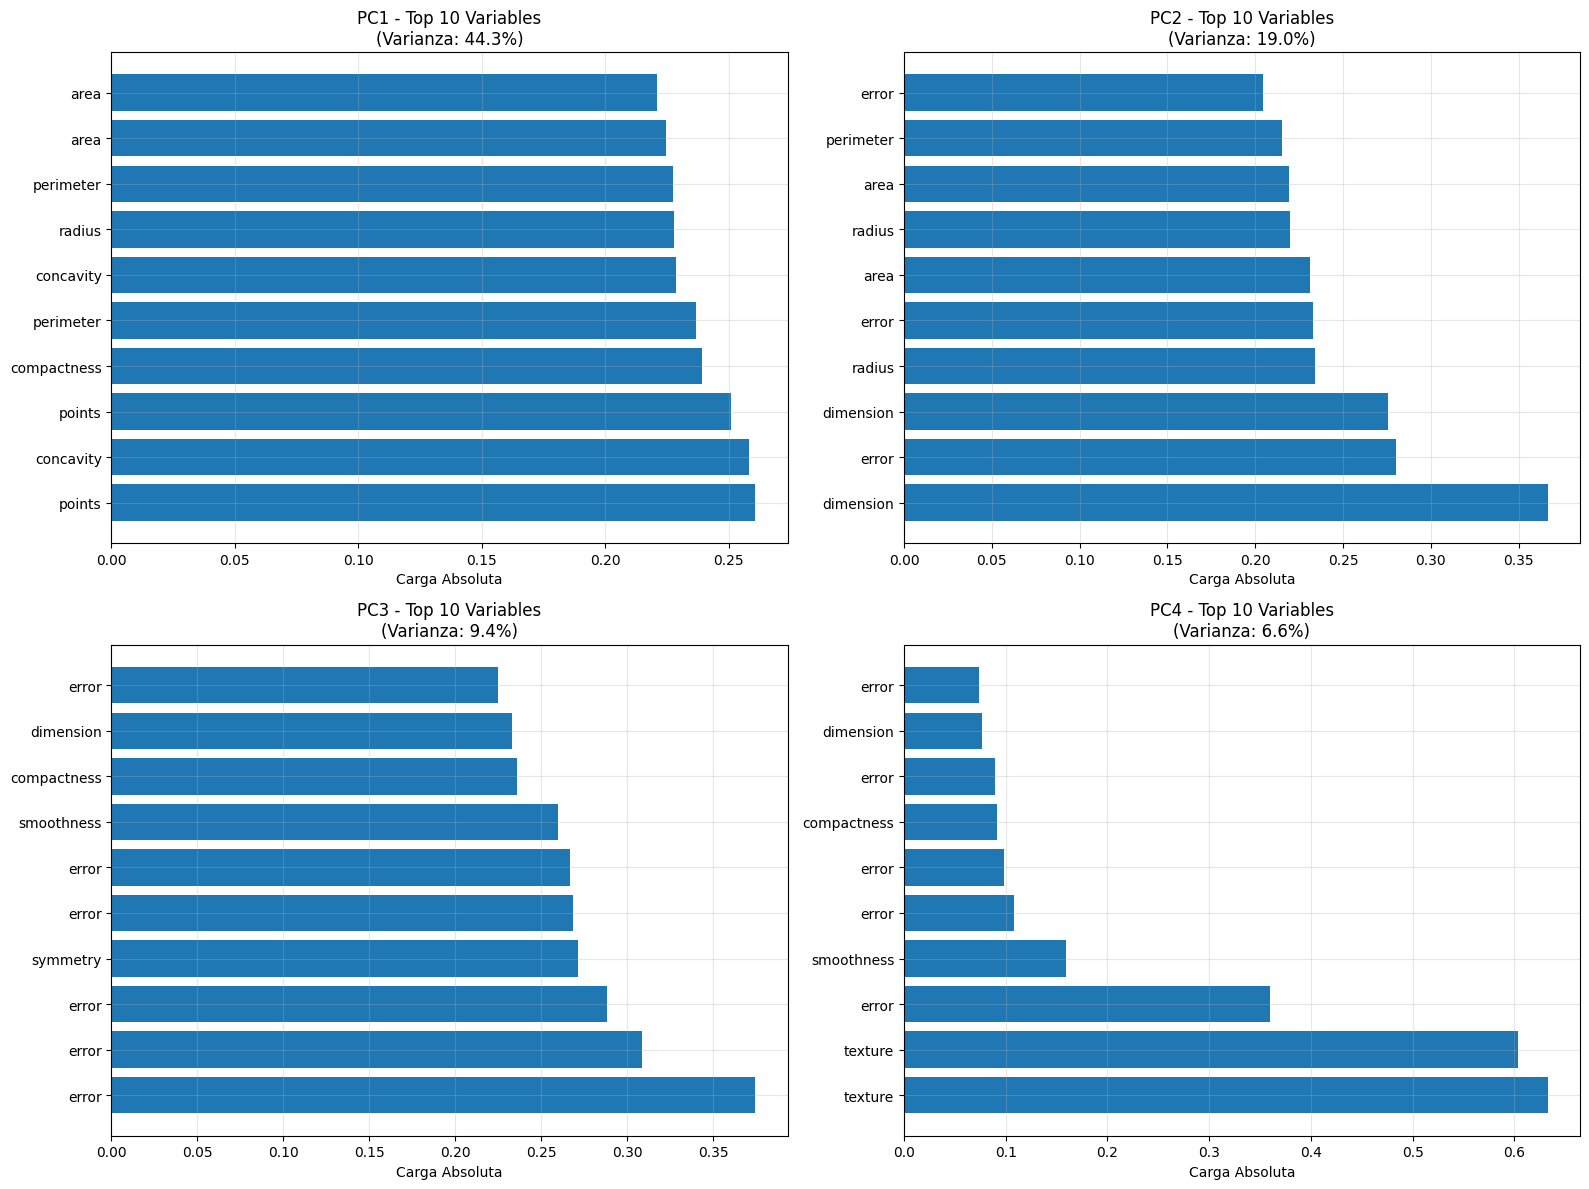

In [20]:

# Visualizar las cargas de las primeras componentes
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for i in range(min(4, componentes.shape[0])):
   pc = f'PC{i+1}'
   cargas_pc = df_cargas[pc].abs().sort_values(ascending=False)[:10]

   axes[i].barh(range(len(cargas_pc)), cargas_pc.values)
   axes[i].set_yticks(range(len(cargas_pc)))
   axes[i].set_yticklabels([label.split()[-1] for label in cargas_pc.index])  # Nombre corto
   axes[i].set_xlabel('Carga Absoluta')
   axes[i].set_title(f'{pc} - Top 10 Variables\n(Varianza: {pca_95.explained_variance_ratio_[i]*100:.1f}%)')
   axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# 🔬 EJERCICIOS: Análisis de componentes principales
# Descomenta y practica:

# Ejemplo 1: Crear heatmap de correlaciones entre componentes y variables originales
# plt.figure(figsize=(12, 8))
# correlaciones = df_cargas.iloc[:, :5].T  # Primeras 5 componentes
# sns.heatmap(correlaciones, annot=False, cmap='coolwarm', center=0)
# plt.title('Correlaciones entre Componentes Principales y Variables Originales')
# plt.xlabel('Variables Originales')
# plt.ylabel('Componentes Principales')

# Ejemplo 2: Identificar patrones en las cargas
# cargas_importantes = df_cargas.abs() > 0.3  # Umbral para cargas importantes
# print("Variables con cargas importantes (>0.3) por componente:")
# for col in df_cargas.columns[:5]:
#     vars_importantes = df_cargas[cargas_importantes[col]].index.tolist()
#     print(f"  {col}: {len(vars_importantes)} variables importantes")

# Ejemplo 3: Analizar contribución de cada tipo de medida
# tipos_medida = ['mean', 'se', 'worst']
# for tipo in tipos_medida:
#     vars_tipo = [col for col in df.columns if tipo in col]
#     contribucion_promedio = df_cargas.loc[vars_tipo, :5].abs().mean()
#     print(f"\nContribución promedio de medidas '{tipo}':")
#     print(contribucion_promedio.round(3))

#SelectKBest
Es un método de selección de características que mantiene las K variables originales más relevantes según pruebas estadísticas univariadas. A diferencia de PCA, no transforma los datos sino que selecciona un subconjunto de las variables originales.

🏥 Aplicaciones en Datos Médicos

* Identificación de biomarcadores: Seleccionar genes o proteínas más correlacionados con enfermedades
* Análisis de laboratorio: Elegir pruebas clínicas más discriminativas para diagnóstico
* Estudios epidemiológicos: Identificar factores de riesgo más significativos
* Modelos predictivos: Reducir dimensionalidad manteniendo interpretabilidad clínica

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris


# Cargar el conjunto de datos de ejemplo (iris)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

print("🌸 ANÁLISIS DE CARACTERÍSTICAS CON SelectKBest")
print("=" * 50)
print(f"Dataset original: {X.shape}")
print(f"Variables disponibles: {list(X.columns)}")
print(f"Clases objetivo: {iris.target_names}")

# Aplicar SelectKBest
k = 3  # Seleccionar las 3 mejores características (debe estar justificado)
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

print(f"\n🔍 SELECCIÓN DE LAS {k} MEJORES CARACTERÍSTICAS:")
print(f"Dimensión reducida: {X.shape[1]} → {X_new.shape[1]} variables")

# Obtener los índices de las características seleccionadas
selected_feature_indices = selector.get_support(indices=True)

# Obtener los nombres de las características seleccionadas
selected_features = X.columns[selected_feature_indices].tolist()

print("✅ Características seleccionadas:", selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
X_selected = pd.DataFrame(X_new, columns=selected_features)

print(f"\n📊 DATOS CON CARACTERÍSTICAS SELECCIONADAS:")
print(X_selected.head())


🌸 ANÁLISIS DE CARACTERÍSTICAS CON SelectKBest
Dataset original: (150, 4)
Variables disponibles: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases objetivo: ['setosa' 'versicolor' 'virginica']

🔍 SELECCIÓN DE LAS 3 MEJORES CARACTERÍSTICAS:
Dimensión reducida: 4 → 3 variables
✅ Características seleccionadas: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']

📊 DATOS CON CARACTERÍSTICAS SELECCIONADAS:
   sepal length (cm)  petal length (cm)  petal width (cm)
0                5.1                1.4               0.2
1                4.9                1.4               0.2
2                4.7                1.3               0.2
3                4.6                1.5               0.2
4                5.0                1.4               0.2



💡 INTERPRETACIÓN:
   • Puntuación F mide la capacidad discriminativa de cada variable
   • Mayor puntuación = mejor capacidad para distinguir entre clases
   • Variables seleccionadas son las más informativas para clasificación


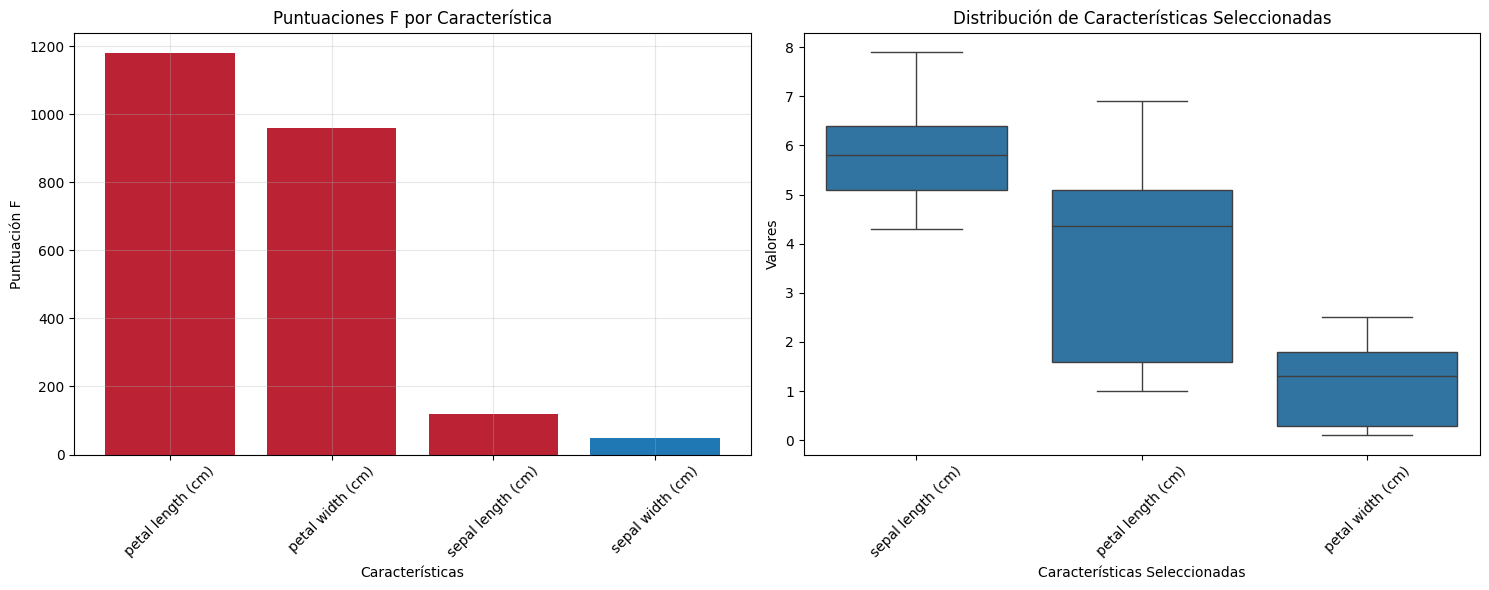

In [29]:

# Obtener las puntuaciones de todas las características
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Interpretación de resultados
print(f"\n💡 INTERPRETACIÓN:")
print(f"   • Puntuación F mide la capacidad discriminativa de cada variable")
print(f"   • Mayor puntuación = mejor capacidad para distinguir entre clases")
print(f"   • Variables seleccionadas son las más informativas para clasificación")

# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de puntuaciones
ax1.bar(feature_scores['Feature'], feature_scores['Score'])
ax1.set_title('Puntuaciones F por Característica')
ax1.set_ylabel('Puntuación F')
ax1.set_xlabel('Características')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Marcar las características seleccionadas
for i, (feature, score) in enumerate(zip(feature_scores['Feature'], feature_scores['Score'])):
   if feature in selected_features:
       ax1.bar(feature, score, color='red', alpha=0.7)

# Boxplot comparativo de características seleccionadas
melted_data = pd.melt(X_selected.reset_index(), id_vars=['index'],
                    value_vars=selected_features, var_name='Feature', value_name='Value')
sns.boxplot(data=melted_data, x='Feature', y='Value', ax=ax2)
ax2.set_title('Distribución de Características Seleccionadas')
ax2.set_xlabel('Características Seleccionadas')
ax2.set_ylabel('Valores')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

# 🏥 EJERCICIOS: Aplicación de SelectKBest
# Descomenta y practica:

# Ejemplo 1: Comparar con diferentes valores de k
# for k_val in [1, 2, 3, 4]:
#     selector_k = SelectKBest(score_func=f_classif, k=k_val)
#     selector_k.fit(X, y)
#     selected_k = X.columns[selector_k.get_support(indices=True)].tolist()
#     print(f"k={k_val}: {selected_k}")

# Ejemplo 2: Usar diferentes funciones de puntuación
# from sklearn.feature_selection import chi2, mutual_info_classif
# # Nota: chi2 requiere valores no negativos
# X_pos = X - X.min()  # Hacer valores positivos
# selector_chi2 = SelectKBest(score_func=chi2, k=3)
# selector_chi2.fit(X_pos, y)
# selected_chi2 = X.columns[selector_chi2.get_support(indices=True)].tolist()
# print(f"Selección con chi2: {selected_chi2}")

# Ejemplo 3: Aplicar a datos médicos sintéticos
# datos_medicos = pd.DataFrame({
#     'edad': np.random.normal(50, 15, 100),
#     'presion_sistolica': np.random.normal(130, 20, 100),
#     'colesterol': np.random.normal(200, 40, 100),
#     'glucosa': np.random.normal(100, 20, 100),
#     'imc': np.random.normal(25, 5, 100)
# })
# # Crear target correlacionado con algunas variables
# target_medico = (datos_medicos['presion_sistolica'] > 140).astype(int)
# selector_medico = SelectKBest(score_func=f_classif, k=3)
# selector_medico.fit(datos_medicos, target_medico)
# vars_importantes = datos_medicos.columns[selector_medico.get_support(indices=True)].tolist()
# print(f"Variables médicas más importantes: {vars_importantes}")

/tmp/ipython-input-33-1154235744.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


📊 RESUMEN DE IMPORTANCIA DE CARACTERÍSTICAS:
   • Características seleccionadas: 3
   • Puntuación máxima: 1180.16
   • Puntuación mínima: 49.16
   • Características seleccionadas: ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)']


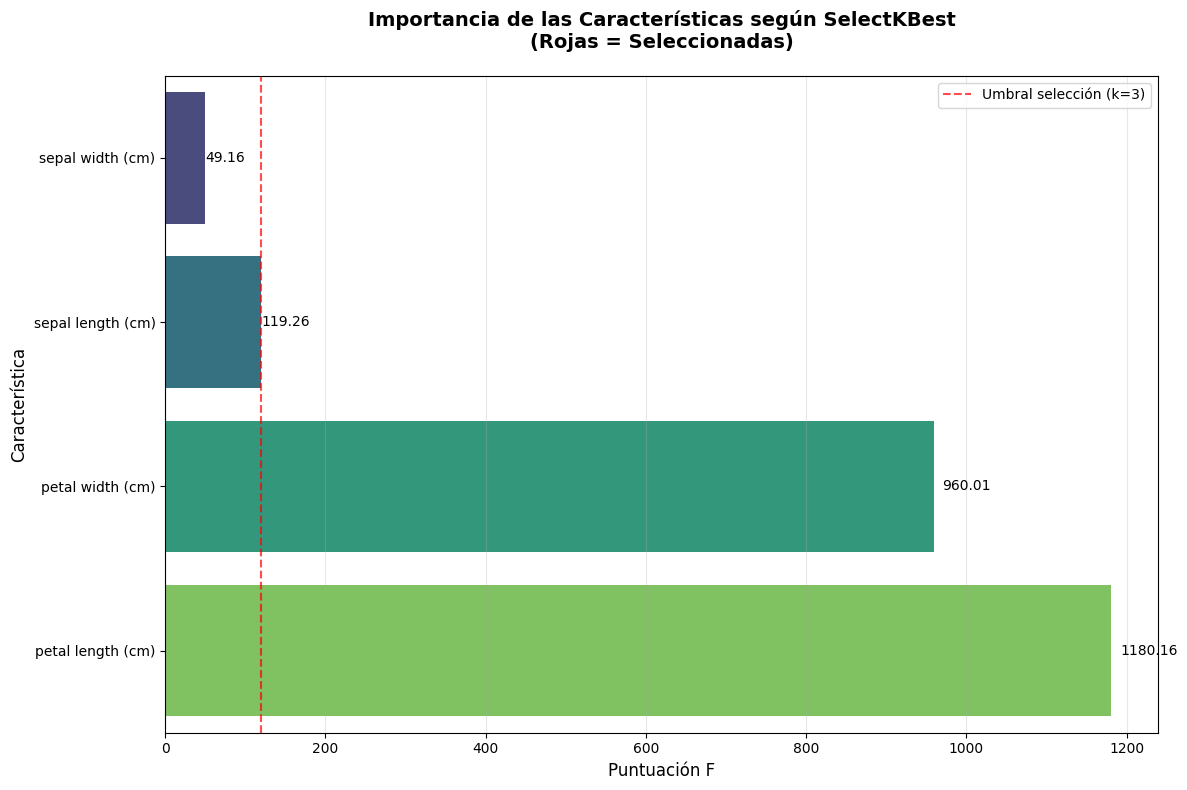

In [33]:
def plot_feature_importance(selector, feature_names):
   """
   Genera un gráfico de barras que muestra la importancia de las características
   según el análisis de SelectKBest.

   """

   # Obtener las puntuaciones y crear DataFrame
   scores = selector.scores_
   feature_scores = pd.DataFrame({
       'Característica': feature_names,
       'Puntuación': scores
   })

   # Ordenar por puntuación descendente para mejor visualización
   feature_scores = feature_scores.sort_values('Puntuación', ascending=True)

   # Identificar características seleccionadas
   selected_indices = selector.get_support(indices=True)
   selected_features = feature_names[selected_indices].tolist()

   # Crear colores diferenciados para características seleccionadas
   colors = ['red' if feat in selected_features else 'lightblue'
             for feat in feature_scores['Característica']]

   # Crear la figura
   plt.figure(figsize=(12, 8))

   # Generar el gráfico de barras horizontales
   ax = sns.barplot(
       data=feature_scores,
       y='Característica',
       x='Puntuación',
       palette="viridis",
       dodge=False
   )

   # Personalizar el gráfico
   plt.title('Importancia de las Características según SelectKBest\n(Rojas = Seleccionadas)',
             pad=20, fontsize=14, fontweight='bold')
   plt.xlabel('Puntuación F', fontsize=12)
   plt.ylabel('Característica', fontsize=12)

   # Añadir los valores en las barras
   for i, v in enumerate(feature_scores['Puntuación']):
       ax.text(v + v*0.01, i, f'{v:.2f}', va='center', fontsize=10)

   # Añadir línea vertical para destacar umbral de selección
   if len(selected_features) > 0:
       min_selected_score = min([scores[list(feature_names).index(feat)]
                                for feat in selected_features])
       plt.axvline(x=min_selected_score, color='red', linestyle='--', alpha=0.7,
                  label=f'Umbral selección (k={len(selected_features)})')
       plt.legend()

   plt.grid(axis='x', alpha=0.3)
   plt.tight_layout()

   # Mostrar información adicional
   print(f"📊 RESUMEN DE IMPORTANCIA DE CARACTERÍSTICAS:")
   print(f"   • Características seleccionadas: {len(selected_features)}")
   print(f"   • Puntuación máxima: {scores.max():.2f}")
   print(f"   • Puntuación mínima: {scores.min():.2f}")
   print(f"   • Características seleccionadas: {selected_features}")


# Generar el gráfico
fig = plot_feature_importance(selector, X.columns)
plt.show()


## ⚖️ SelectKBest vs PCA: Comparación

| Aspecto | SelectKBest | PCA |
|---------|-------------|-----|
| **Tipo de método** | Selección de características | Transformación de características |
| **Variables resultantes** | Subconjunto de variables originales | Nuevas variables (componentes) |
| **Interpretabilidad** | ✅ Alta (mantiene variables originales) | ❌ Baja (componentes abstractos) |
| **Correlaciones** | Ignora correlaciones entre variables | Considera correlaciones |
| **Información perdida** | Elimina variables completas | Comprime información |
| **Uso clínico** | Ideal para identificar biomarcadores | Mejor para reducción dimensional |

### 🎯 Cuándo usar cada método

- **SelectKBest**: Cuando necesitas mantener la interpretabilidad clínica y identificar qué variables específicas son más importantes
- **PCA**: Cuando buscas máxima reducción dimensional y las nuevas variables no necesitan interpretación directa

---

# Material adicional (avanzado)

Aplicacion en imagen médica: ejemplo básico

## Análisis de Componentes Independientes (ICA)

In [ ]:
# Utilizaremos datos de fMRI para nuestro ejemplo con ICA
# Para ello, comenzamos instalando la librería nilearn
!python -m pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.0 MB/s eta 0:00:00


In [ ]:
from nilearn import datasets
# Descargamos un sujeto del estudio con RM funcional
dataset = datasets.fetch_development_fmri(n_subjects=1)
file_name = dataset.func[0]

# Preprocesado de la imagen
from nilearn.input_data import NiftiMasker

# Aplicamos una máscara para extraer el fondo de la imagen (vóxeles no cerebrales)
masker = NiftiMasker(smoothing_fwhm=8, memory='nilearn_cache', memory_level=1,
                     mask_strategy='epi', standardize=True)
data_masked = masker.fit_transform(file_name)


Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/development_fmri


Added README.md to /root/nilearn_data/development_fmri


Dataset created in /root/nilearn_data/development_fmri/development_fmri



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


In [ ]:
from sklearn.decomposition import FastICA
import numpy as np
# Seleccionamos 10 componentes
ica = FastICA(n_components=10, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T
# Aplicamos un corte (80% señal) en los datos después de normalizar según
# la media y desviación estándar de los datos
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
components_masked[np.abs(components_masked) < .8] = 0
# Invertimos la transformación para recuperar la estructura 3D
component_img = masker.inverse_transform(components_masked)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


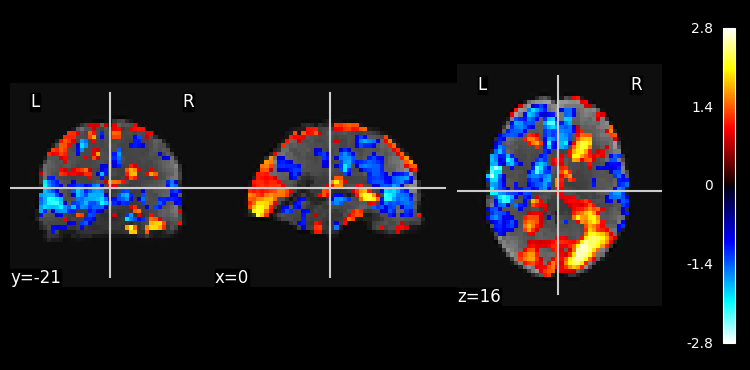

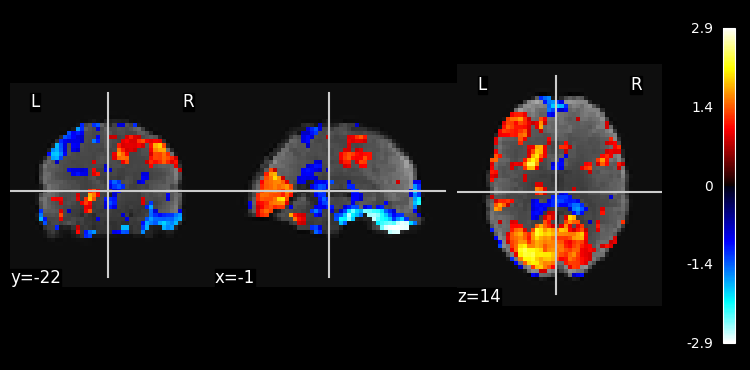

In [ ]:
# Finalmete, visualizamos el resultado de las operaciones de reducción
from nilearn import image
from nilearn.plotting import plot_stat_map, show
from nilearn import datasets

# Datos de un sujeto/paciente
dataset = datasets.fetch_development_fmri(n_subjects=1)
func_filename = dataset.func[0]

mean_img = image.mean_img(func_filename)
plot_stat_map(image.index_img(component_img, 0), mean_img)
plot_stat_map(image.index_img(component_img, 1), mean_img)